# Mini-Project

In [9]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
import numpy as np
# Importing Dataset

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
X_val = np.load("X_val.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")
y_val = np.load("y_val.npy")

In [11]:
# Checking the shapes of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((108, 500, 3), (108,), (36, 500, 3), (36,), (36, 500, 3), (36,))

### 1. Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [1 marks]

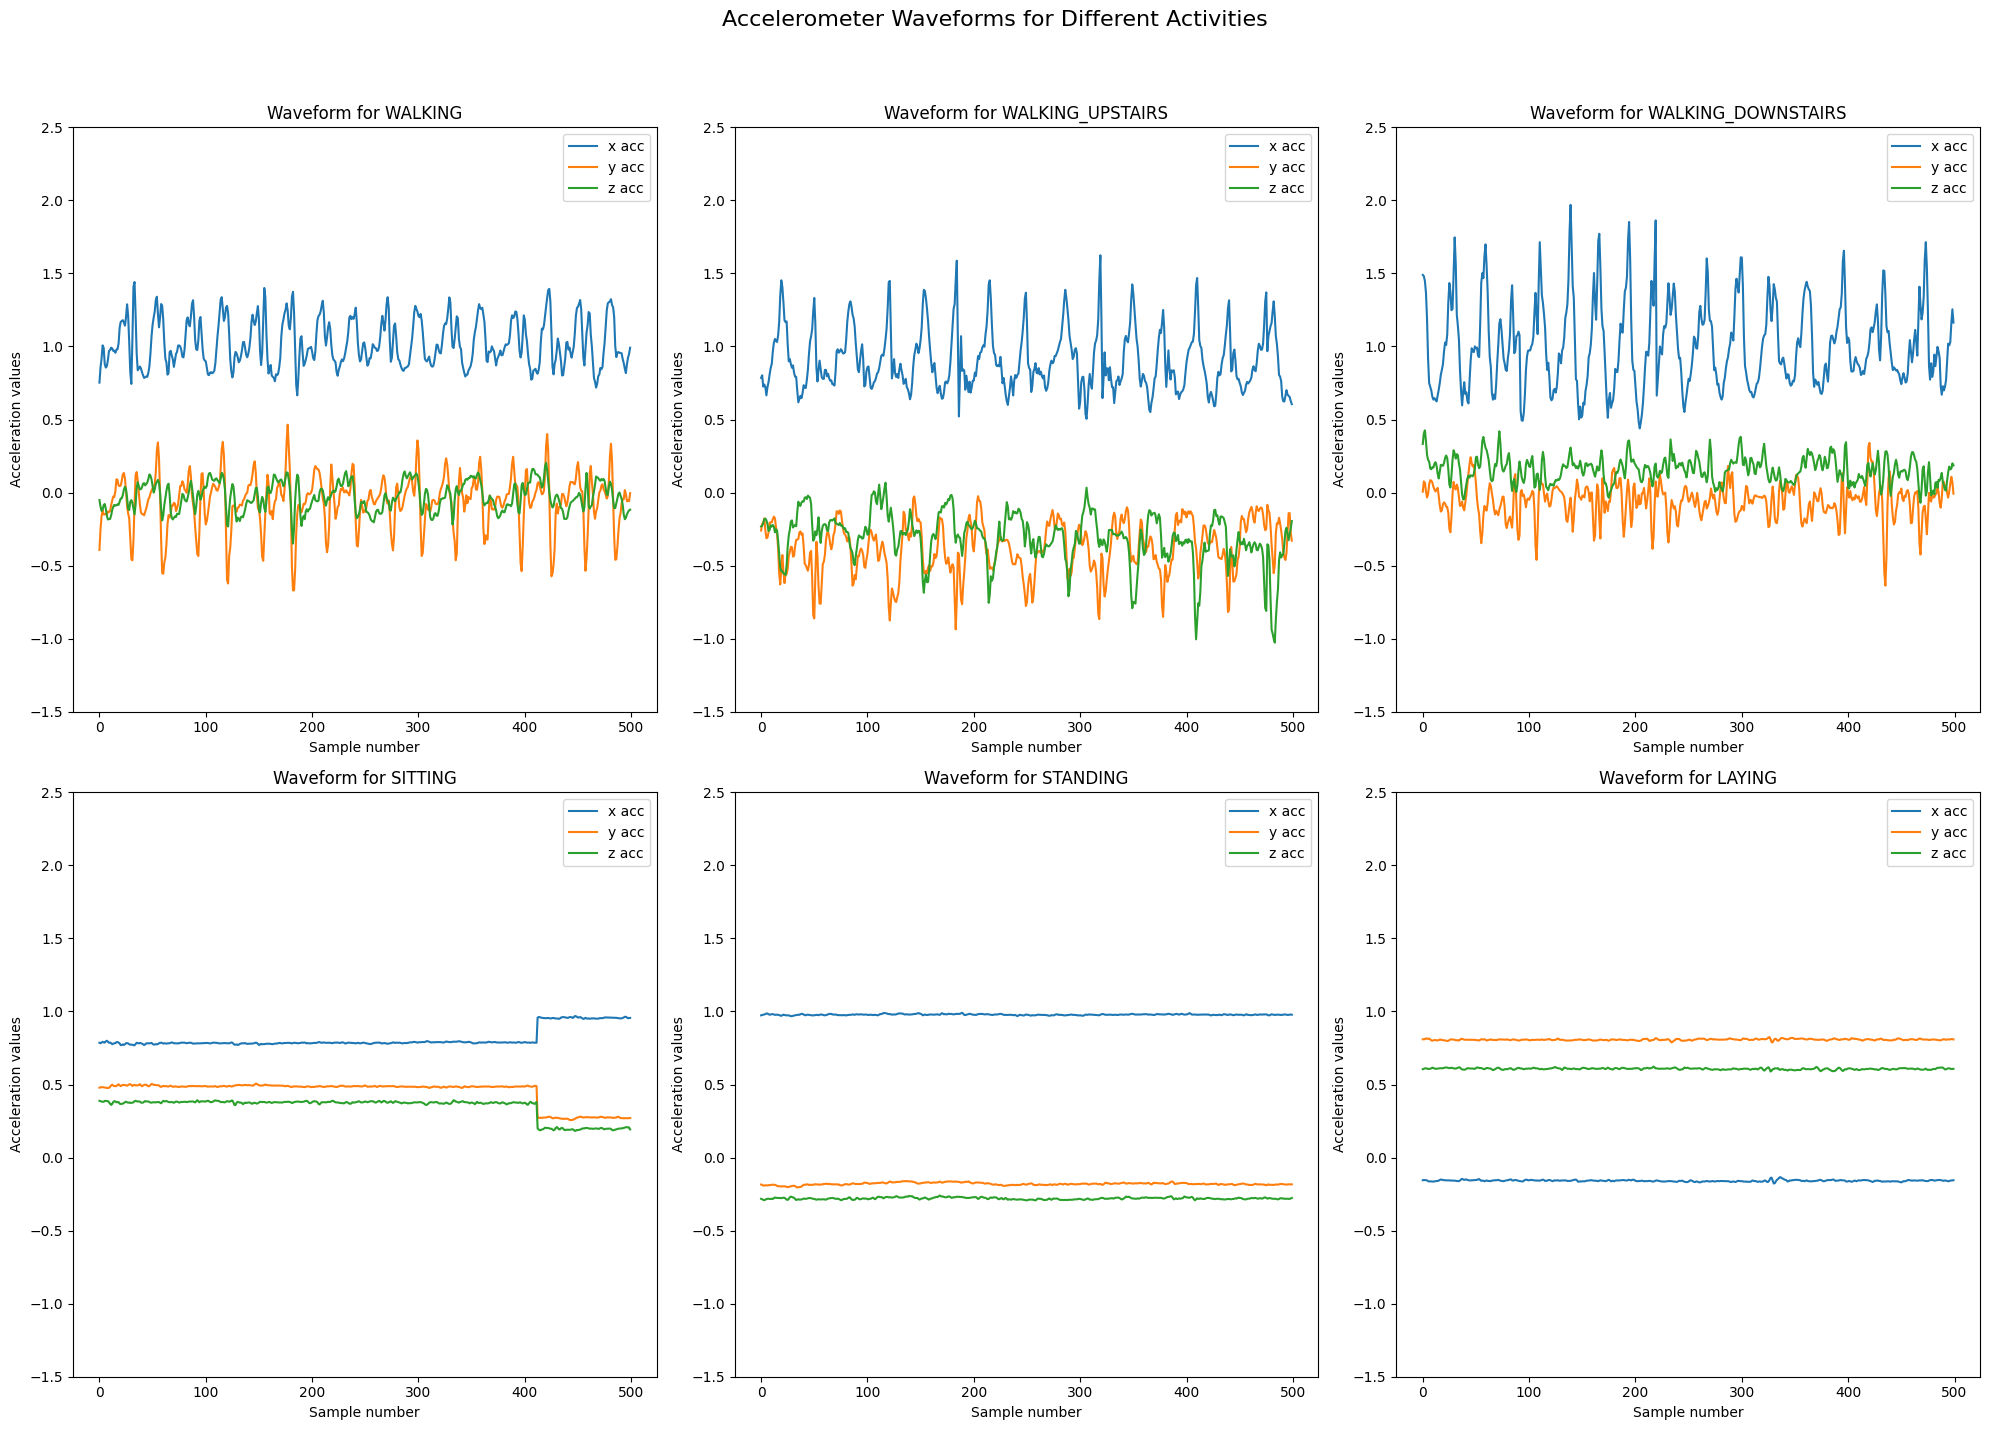

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2,
           "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = X_train[y_train == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> When analyzing accelerometer data for different activities, such as Sitting, Laying, and Standing, it becomes evident that these activities exhibit relatively low variability in acceleration values across all three directions. On the other hand, activities like walking (including upstairs and downstairs movement) demonstrate higher variability in acceleration values along all three axes.

> Considering only the acceleration values as input for the classification model, it is expected that the model should be capable of distinguishing between various activities. This is supported by the observation that acceleration values for each activity are centered around specific ranges, providing a distinct pattern for classification purposes.

> This characteristic can be leveraged to build a model that accurately classifies activities based on the centered acceleration values in each direction, making it a valuable approach for activity recognition.

### 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_x^2+acc_y^2+acc_z^2)$ for each activity and justify your answer. **[1 mark]**

> A machine learning model will be easily able to differentiate between static and dynamic activies as form the above waveforms of all activities we can see highly varying acceleration values in dynamic and almost constant acceleratin values in case of static activities. From this observation we can say that the value of $(acc_x^2+acc_y^2+acc_z^2)$ values would be higher for dynamic activities than static activities we can also confirm this using the below code

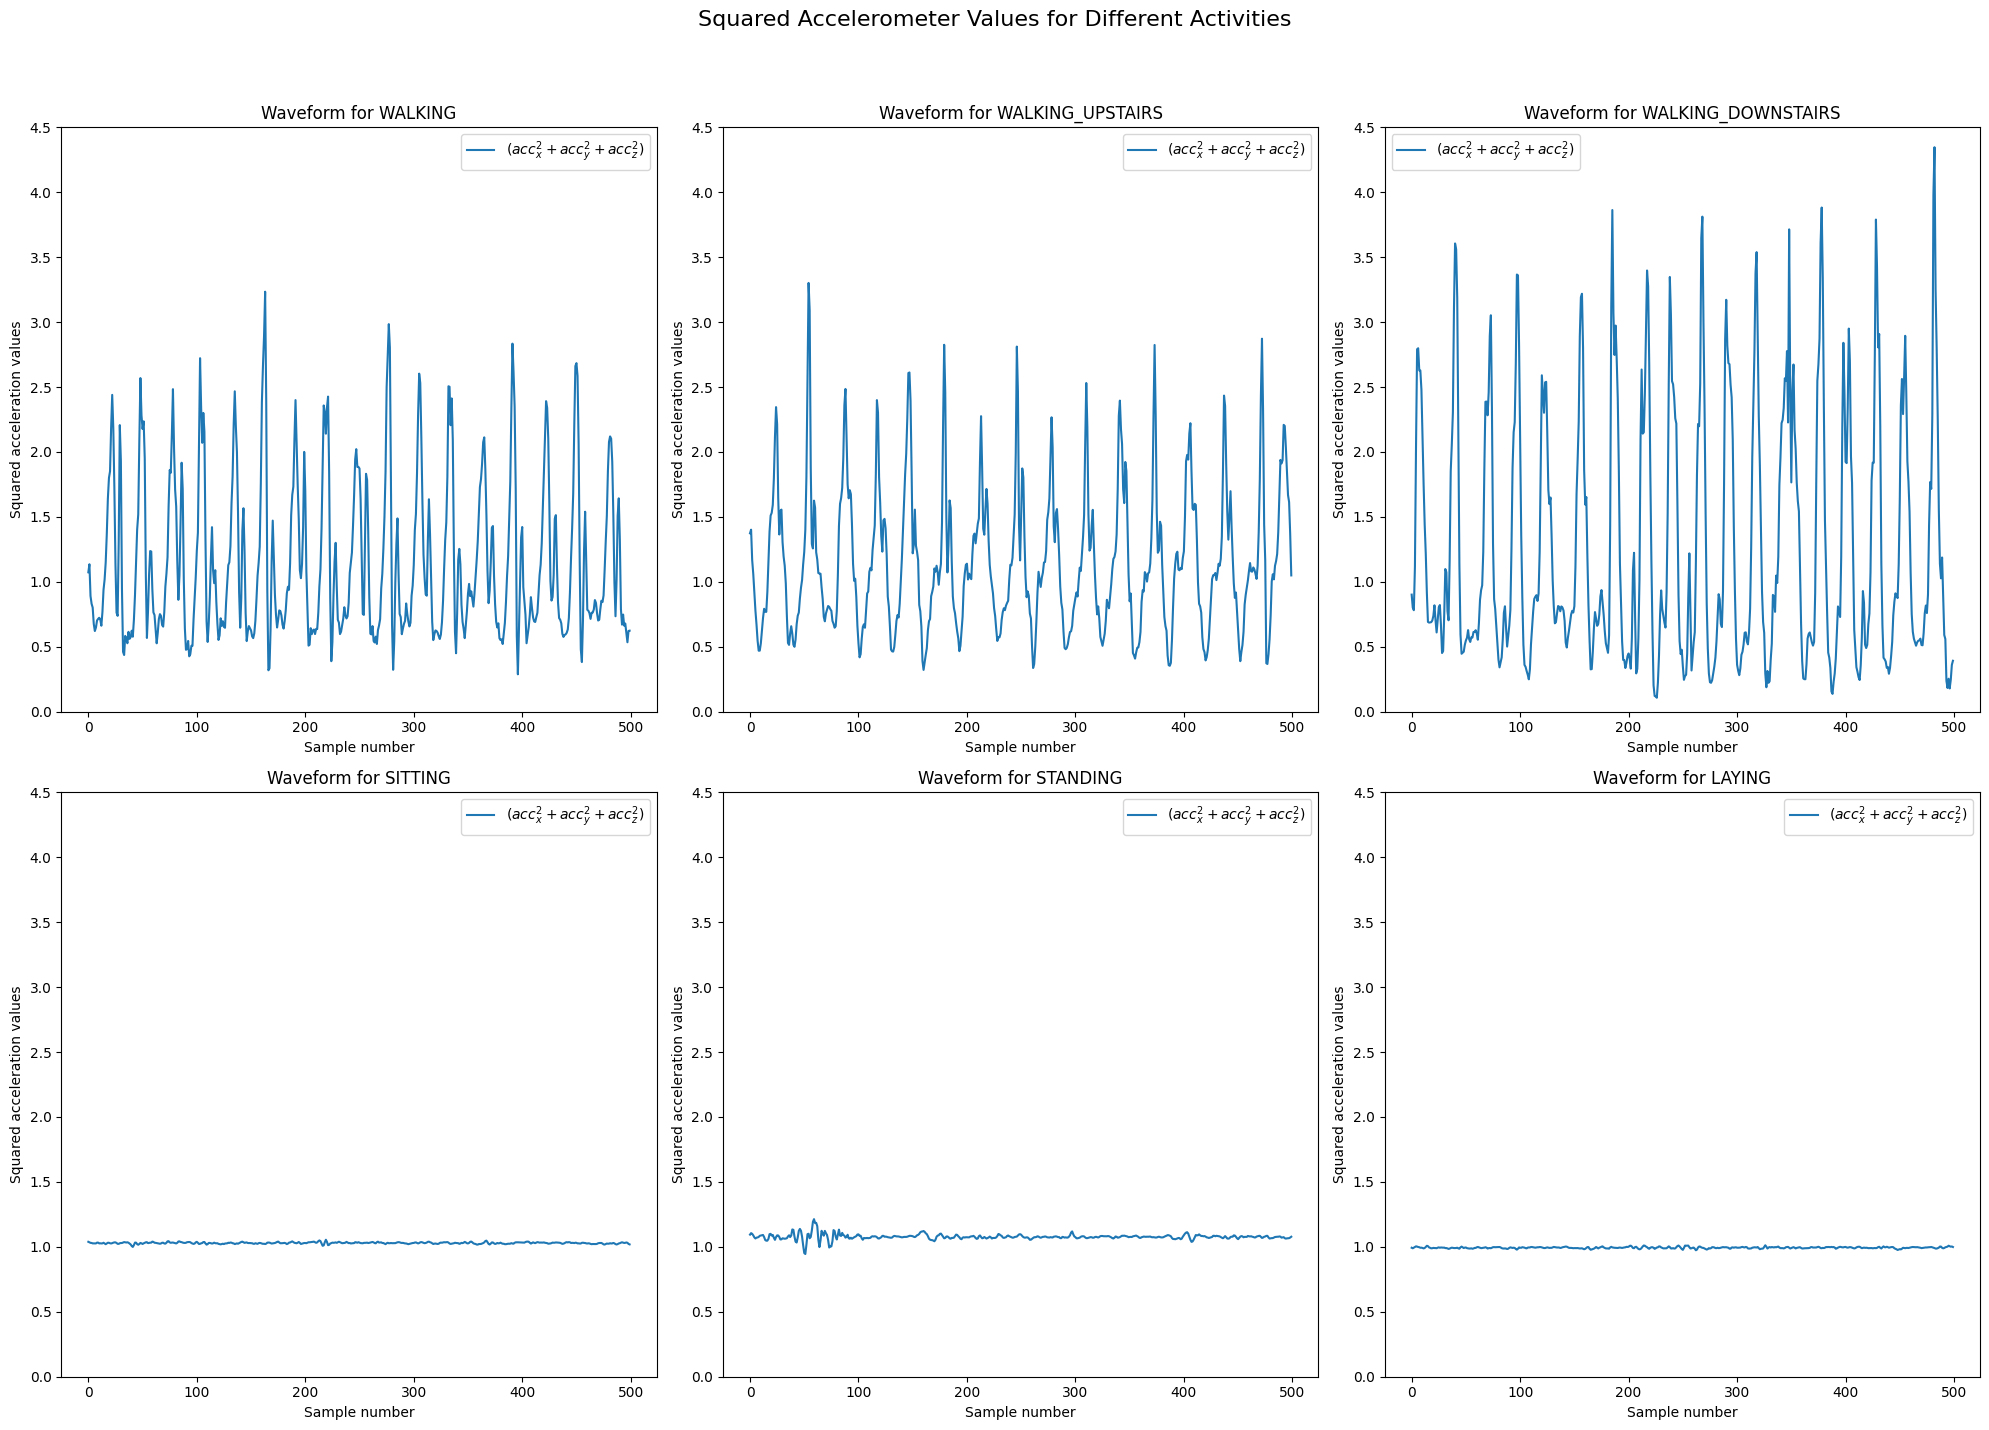

In [13]:
sqrd_values = (X_train**2).sum(axis=2)

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle(
    "Squared Accelerometer Values for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2,
           "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
axes = axes.flatten()

pts = [sqrd_values[y_train == classes[activity]][1] for activity in classes]

for i, activity in enumerate(classes):
    axes[i].plot(pts[i], label=r"$(acc_x^2+acc_y^2+acc_z^2)$", scaley=True)
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Squared acceleration values")
    axes[i].set_ylim([0, 4.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 3. Train Decision Tree using trainset and report Accuracy and confusion matrix using testset. **[1 mark]**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Flatten the image data to 1D for each sample
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt')

# Train the Decision Tree on the training set
clf.fit(X_train_flat, y_train)

# Evaluate on the training set
t_ac = accuracy_score(y_train, clf.predict(X_train_flat))
print("Accuracy on train dataset", t_ac * 100)

# Evaluate on the test set
test_ac = accuracy_score(y_test, clf.predict(X_test_flat))
print("Accuracy on test dataset", test_ac * 100)

# Evaluate on the validation set (cross-validation set)
val_ac = accuracy_score(y_val, clf.predict(X_val_flat))
print("Accuracy on validation dataset", val_ac * 100)

Accuracy on train dataset 97.22222222222221
Accuracy on test dataset 66.66666666666666
Accuracy on validation dataset 80.55555555555556


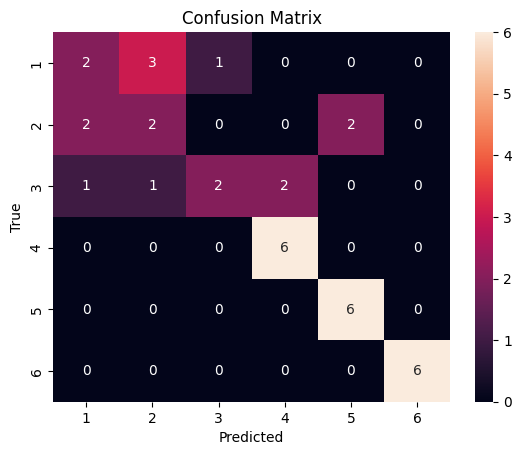

In [15]:
# Importing necessary module for confusion matrix
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix using the model's predictions on the test set
mat = confusion_matrix(y_test, clf.predict(X_test_flat))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

# Adding labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the plot
plt.show()


### 4. Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained. **[1 mark]**

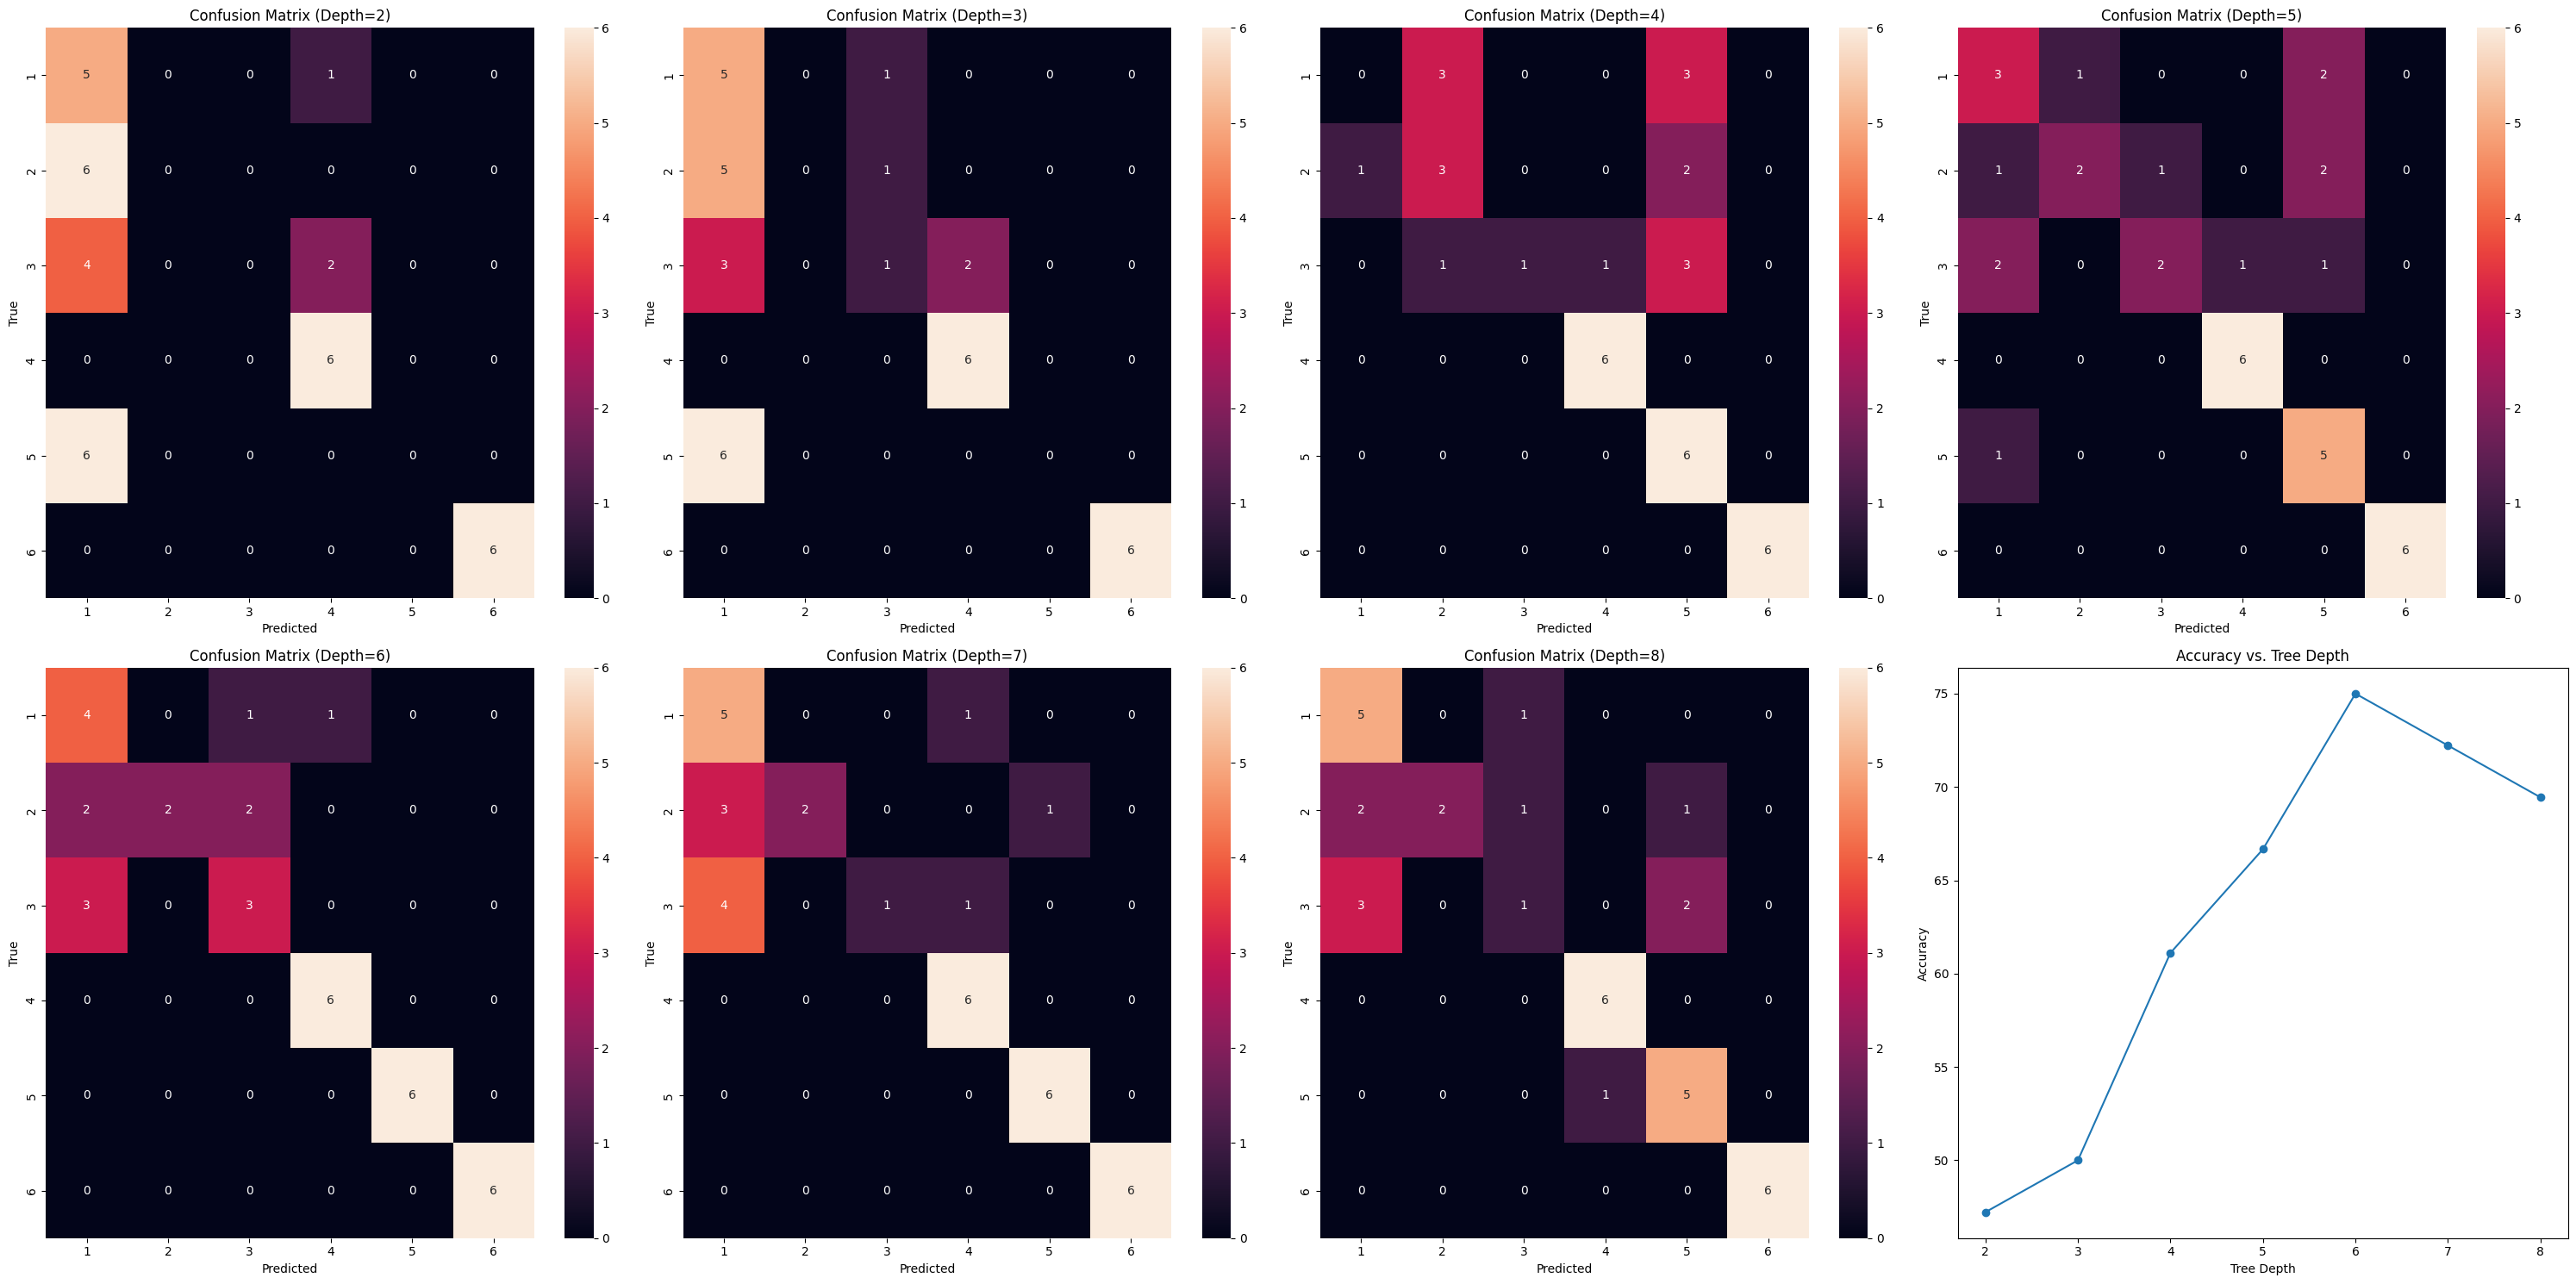

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axes = axes.flatten()
depths = list(range(2, 9))
accuracies_1 = []

for i, depth in enumerate(depths):

    dt_model = DecisionTreeClassifier(
        criterion="gini", max_depth=depth, random_state=42, max_features='sqrt')

    dt_model.fit(X_train_flat, y_train)

    y_pred = dt_model.predict(X_test_flat)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies_1.append(accuracy*100)

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[
                1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6], ax=axes[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")
    axes[i].set_title(f"Confusion Matrix (Depth={depth})")


axes[7].plot(depths, accuracies_1, marker='o')
axes[7].set_xlabel("Tree Depth")
axes[7].set_ylabel("Accuracy")
axes[7].set_title("Accuracy vs. Tree Depth")


plt.tight_layout()

> We observe an increase in accuracy on increasing the depth from 2 to 6. This is followed by a decrease in accuracy for 7 and 8.

> This is because the accuracy usually increases with the depth of the decision tree because a deeper tree can capture more complex patterns in the data. However, after a certain depth, the tree may become too complex and start overfitting to the training data, leading to a decrease in accuracy on new, unseen data (like the test set). Overfitting is a concern when the model becomes too tailored to the training data, capturing noise rather than general patterns.

> The optimal depth is determined through techniques like cross-validation, where the model's performance is evaluated on different subsets of the training data.

### 5. Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference? **[2 marks]**

Accuracy on validation dataset 44.44444444444444
Accuracy on test dataset 52.77777777777778


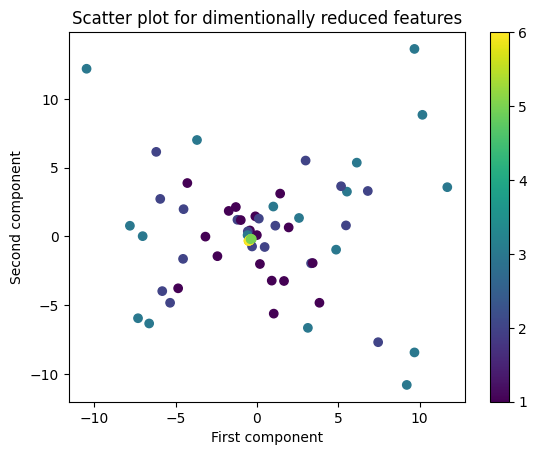

In [17]:
from sklearn.decomposition import PCA

X_train_red = (X_train**2).sum(axis=2)
X_test_red = (X_test**2).sum(axis=2)
X_val_red = (X_val**2).sum(axis=2)

# Applying PCA on the data
pca = PCA(n_components=2)
X_train_red = pca.fit_transform(X_train_red)

# Similarly
X_val_red = pca.transform(X_val_red)
X_test_red = pca.transform(X_test_red)

# Plotting scatter plot
plt.scatter(X_train_red[:,0],X_train_red[:,1],c=y_train)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Scatter plot for dimentionally reduced features")
plt.colorbar()

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt')

clf.fit(X_train_red, y_train)

val_pred = clf.predict(X_val_red)
c_ac = accuracy_score(y_val, val_pred)
print("Accuracy on validation dataset",c_ac*100)

test_pred = clf.predict(X_test_red)
c_ac = accuracy_score(y_test, test_pred)
print("Accuracy on test dataset",c_ac*100)

#### Using TSFEL to create features

In [19]:
import tsfel

cfg = tsfel.get_features_by_domain()
X_train_extracted = []

for i in range(len(X_train)):
    features  =  tsfel.time_series_features_extractor(cfg, X_train[i],fs=50, window_size=250) 
    X_train_extracted.append(np.array(features))

X_val_extracted = []

for i in range(len(X_val)):
    features  =  tsfel.time_series_features_extractor(cfg, X_val[i],fs=50, window_size=250) 
    X_val_extracted.append(np.array(features))

X_test_extracted = []

for i in range(len(X_test)):
    features  =  tsfel.time_series_features_extractor(cfg, X_test[i],fs=50, window_size=250) 
    X_test_extracted.append(np.array(features))

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


KeyboardInterrupt: 

In [ ]:
X_train_extracted = np.array(X_train_extracted)
X_val_extracted = np.array(X_val_extracted)
X_test_extracted = np.array(X_test_extracted)

X_train_extracted= X_train_extracted.reshape(X_train_extracted.shape[0],-1)
X_test_extracted= X_test_extracted.reshape(X_test_extracted.shape[0],-1)
X_val_extracted= X_val_extracted.reshape(X_val_extracted.shape[0],-1)


print(f"Shape of extracted features matrix on train set {X_train_extracted.shape}")
print(f"Shape of extracted features matrix on test set {X_test_extracted.shape}")
print(f"Shape of extracted features matrix on val set {X_val_extracted.shape}")

Shape of extracted features matrix on train set (108, 1554)
Shape of extracted features matrix on test set (36, 1554)
Shape of extracted features matrix on val set (36, 1554)


Using PCA to find the best extracted features

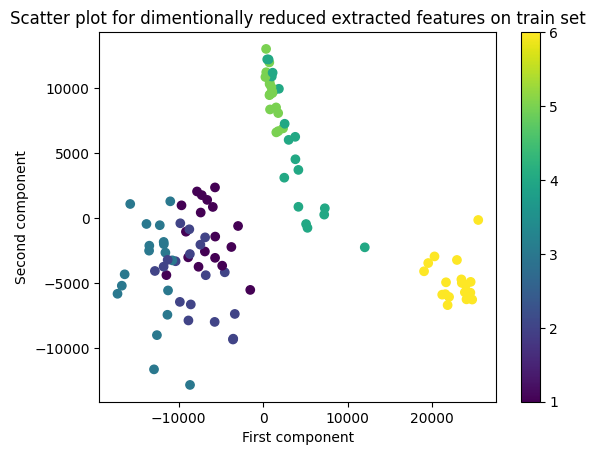

In [ ]:
X_train_extracted_pca = pca.fit_transform(X_train_extracted)

# Similarly
X_val_extracted_pca = pca.transform(X_val_extracted)
X_test_extracted_pca = pca.transform(X_test_extracted)

# Plotting scatter plot
plt.scatter(X_train_extracted_pca[:,0],X_train_extracted_pca[:,1],c=y_train)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Scatter plot for dimentionally reduced extracted features on train set")
plt.colorbar()
plt.show()

>Using a feature extraction library like TSFEL allows for the creation of more complex and task-specific features. These features provide a richer representation of the data compared to the raw total acceleration.

>The PCA plots for total acceleration and TSFEL features show different patterns. While PCA on total acceleration captures general variations, PCA on TSFEL features emphasize more task-specific characteristics.

>The activities that we have (i.e. walking, walking upstairs, walking downstairs, sitting, laying, standing), have some unique patterns that are no well-captured by the total acceleration. The PCA on TSFEL features provides a more clearer separation between different classes as compared to that from PCA on Total Acceleration.

### 6. Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question. **[2 marks]**

> Yes, featuring works better than using raw data as we can see from the above scatter plot. This is mainly because:
> 1. Featurization allows for the creation of more complex and task-specific features. These features provide a richer representation of the data compared to the raw total acceleration.
> 2. Featurization allows for the extraction of relevant information and potentially highlights important characteristics of the data.

Accuracy using extracted features on train set 98.148%
Accuracy using extracted features on test set 86.111%


[]

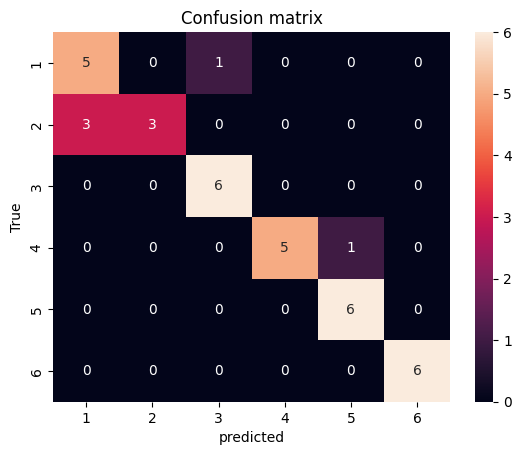

In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini', min_samples_split=4, random_state=46, max_features='sqrt')

clf.fit(X_train_extracted, y_train)
y_predicted_train = clf.predict(X_train_extracted)
tr_acc = accuracy_score(y_train, y_predicted_train)
print(
    f"Accuracy using extracted features on train set {round(tr_acc*100, 3)}%")

y_predicted = clf.predict(X_test_extracted)
te_acc = accuracy_score(y_test, y_predicted)
print(f"Accuracy using extracted features on test set {round(te_acc*100, 3)}%")

cm = confusion_matrix(y_test, y_predicted)

sns.heatmap(cm, annot=True, fmt="d", cbar=True, xticklabels=[
    1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("True")
plt.plot()

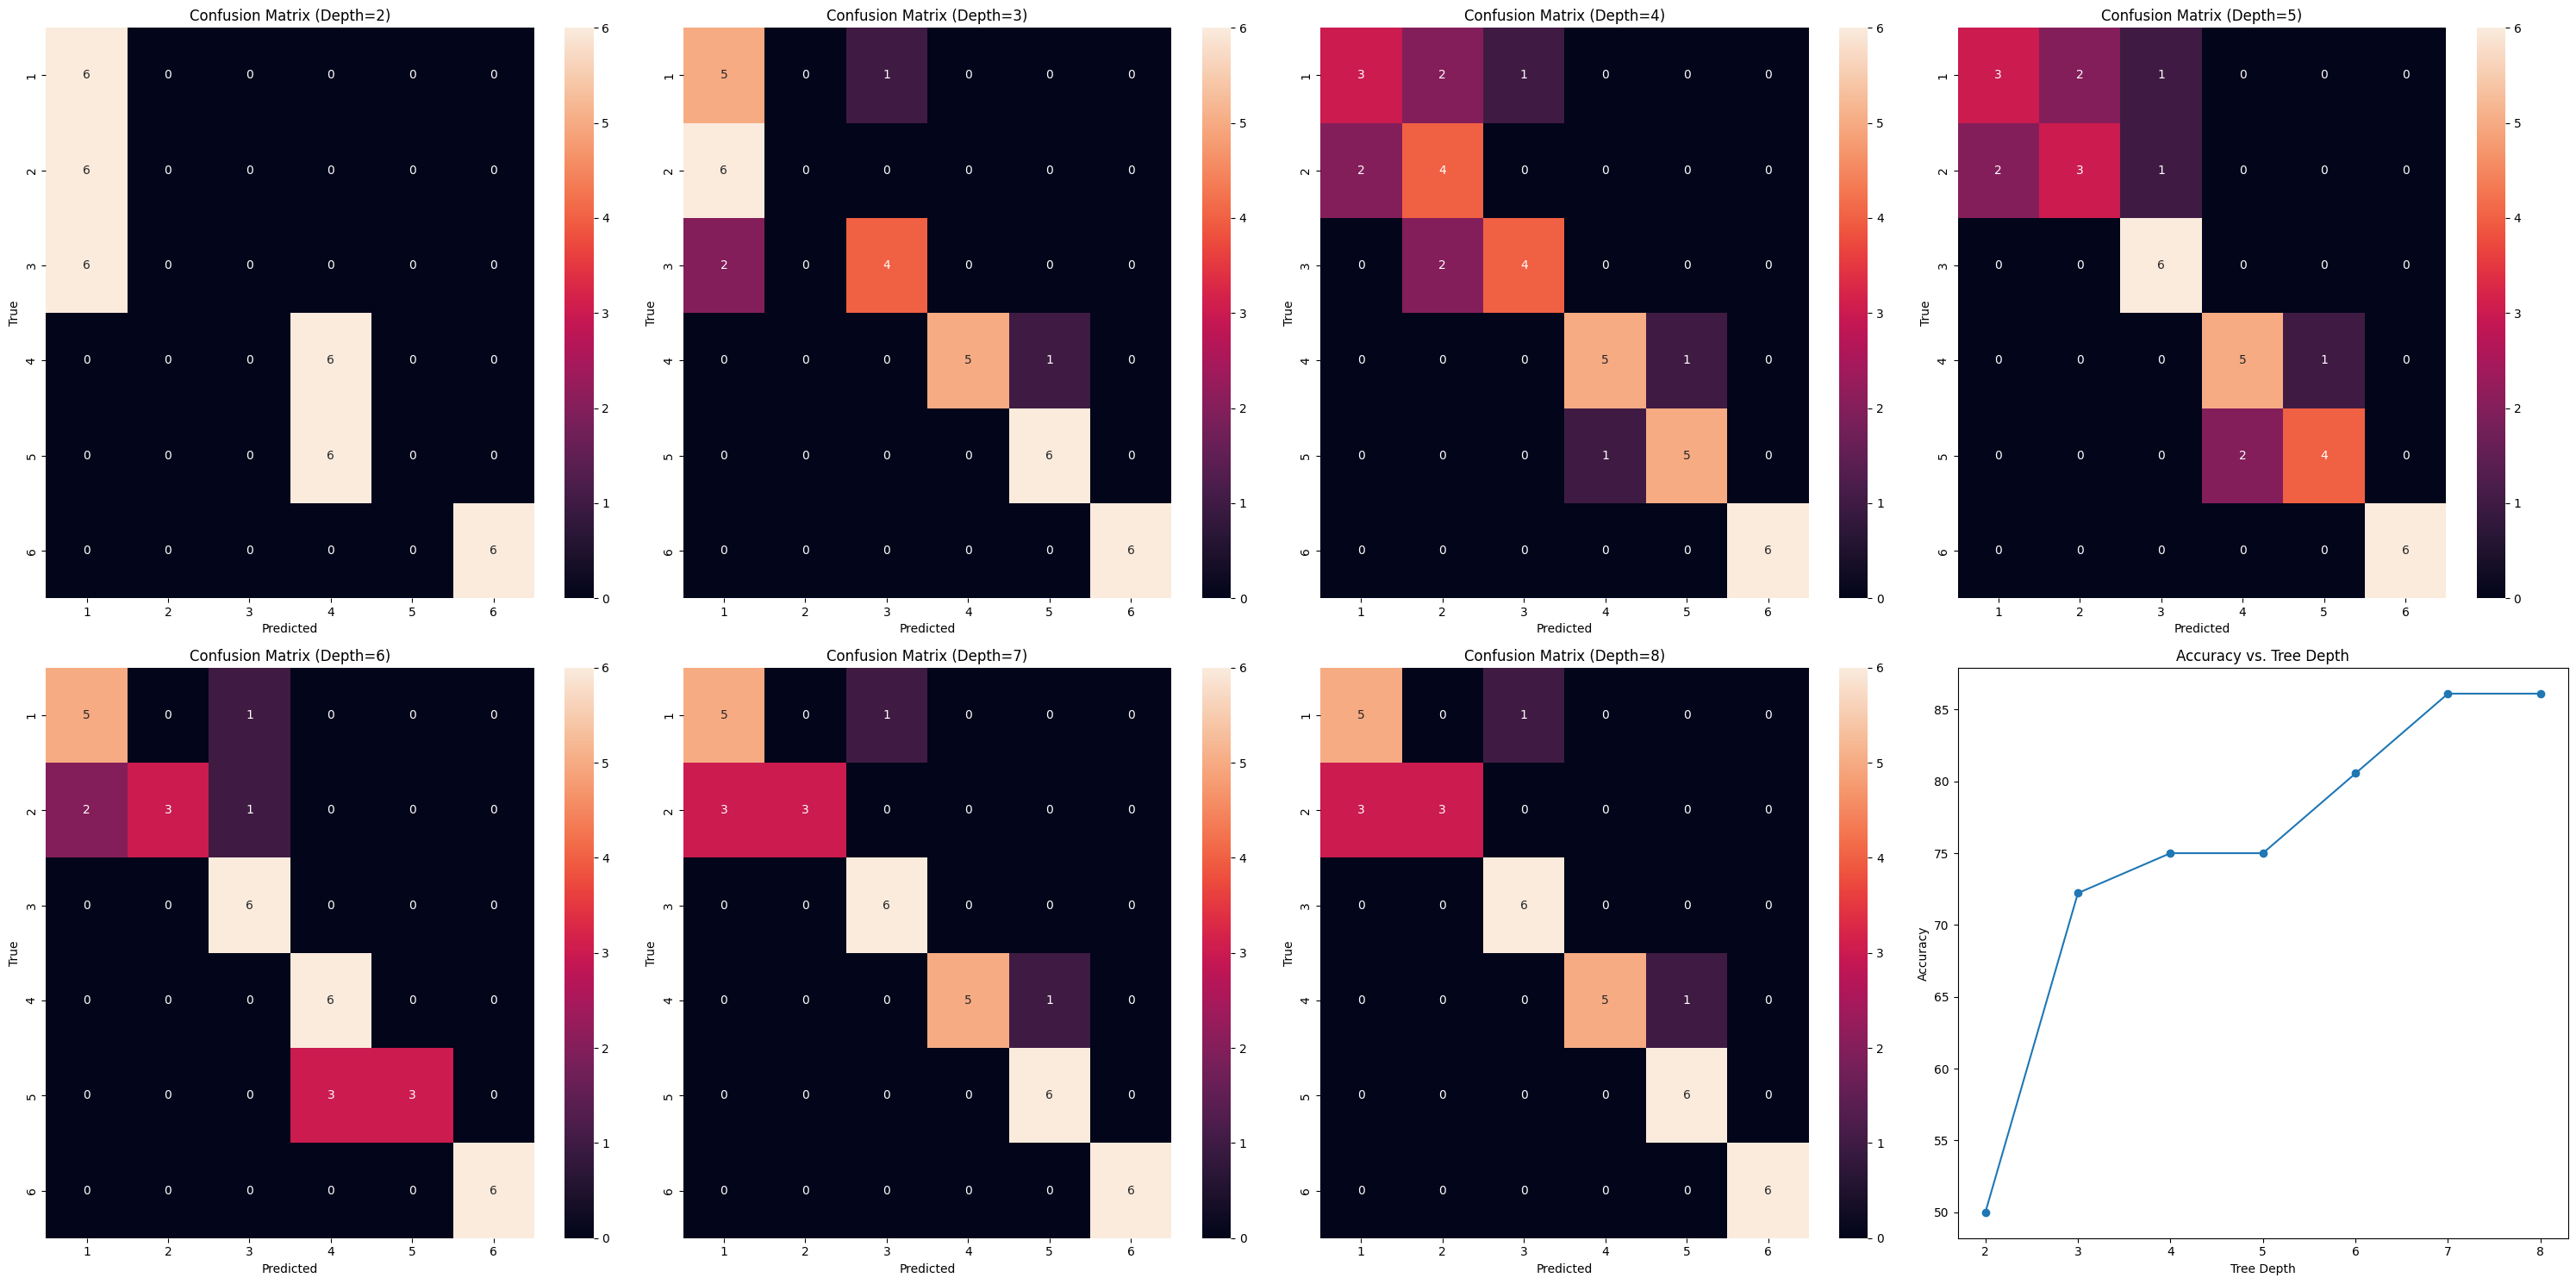

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axes = axes.flatten()
depths = list(range(2, 9))
accuracies_2 = []

for i, depth in enumerate(depths):

    dt_model = DecisionTreeClassifier(
        max_depth=depth, random_state=46, max_features='sqrt', min_samples_split=4)

    dt_model.fit(X_train_extracted, y_train)

    y_pred = dt_model.predict(X_test_extracted)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies_2.append(accuracy*100)

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[
                1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6], ax=axes[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")
    axes[i].set_title(f"Confusion Matrix (Depth={depth})")


axes[7].plot(depths, accuracies_2, marker='o')
axes[7].set_xlabel("Tree Depth")
axes[7].set_ylabel("Accuracy")
axes[7].set_title("Accuracy vs. Tree Depth")


plt.tight_layout()

#### Comparing accuracies between model trained on raw data and featured data

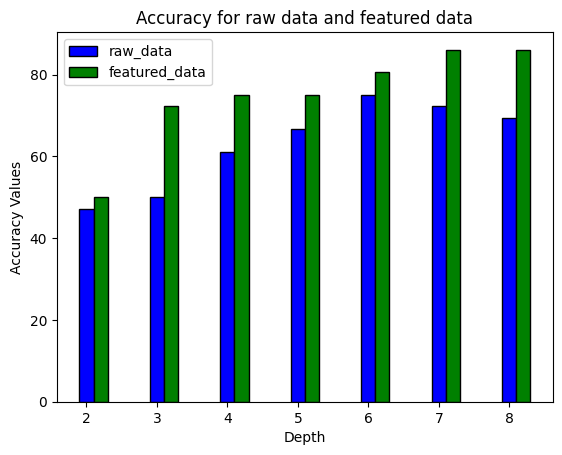

In [ ]:
categories = np.array(list(range(2,9)))

bar_width = 0.2

plt.bar(categories, accuracies_1, width=bar_width, label='raw_data', color='blue', edgecolor='black',)
plt.bar(categories + bar_width, accuracies_2, width=bar_width, label='featured_data', color='green', edgecolor='black', )

plt.xlabel('Depth')
plt.ylabel('Accuracy Values')
plt.title('Accuracy for raw data and featured data')
plt.legend()
plt.show()

### 7. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? **[1 mark]**

#### Confusion Matrix for our model

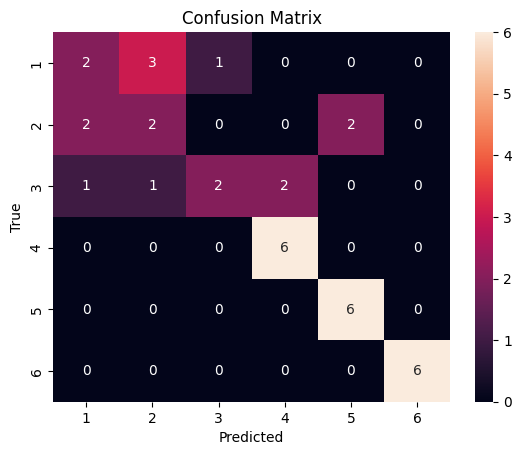

In [ ]:
# Flatten the image data to 1D for each sample
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt')

# Train the Decision Tree on the training set
clf.fit(X_train_flat, y_train)

# Calculating the confusion matrix using the model's predictions on the test set
mat = confusion_matrix(y_test, clf.predict(X_test_flat))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

# Adding labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the plot
plt.show()


> The Model performance is bad for the activities of "Walking" and "Walking Downstairs". These activities are often classified as "Walking Upstairs". This is due to the fact that these three activities exhibit similar patterns in acceleration data. The variations in acceleration during these activities are not be distinct enough for a model to reliably differentiate between them.

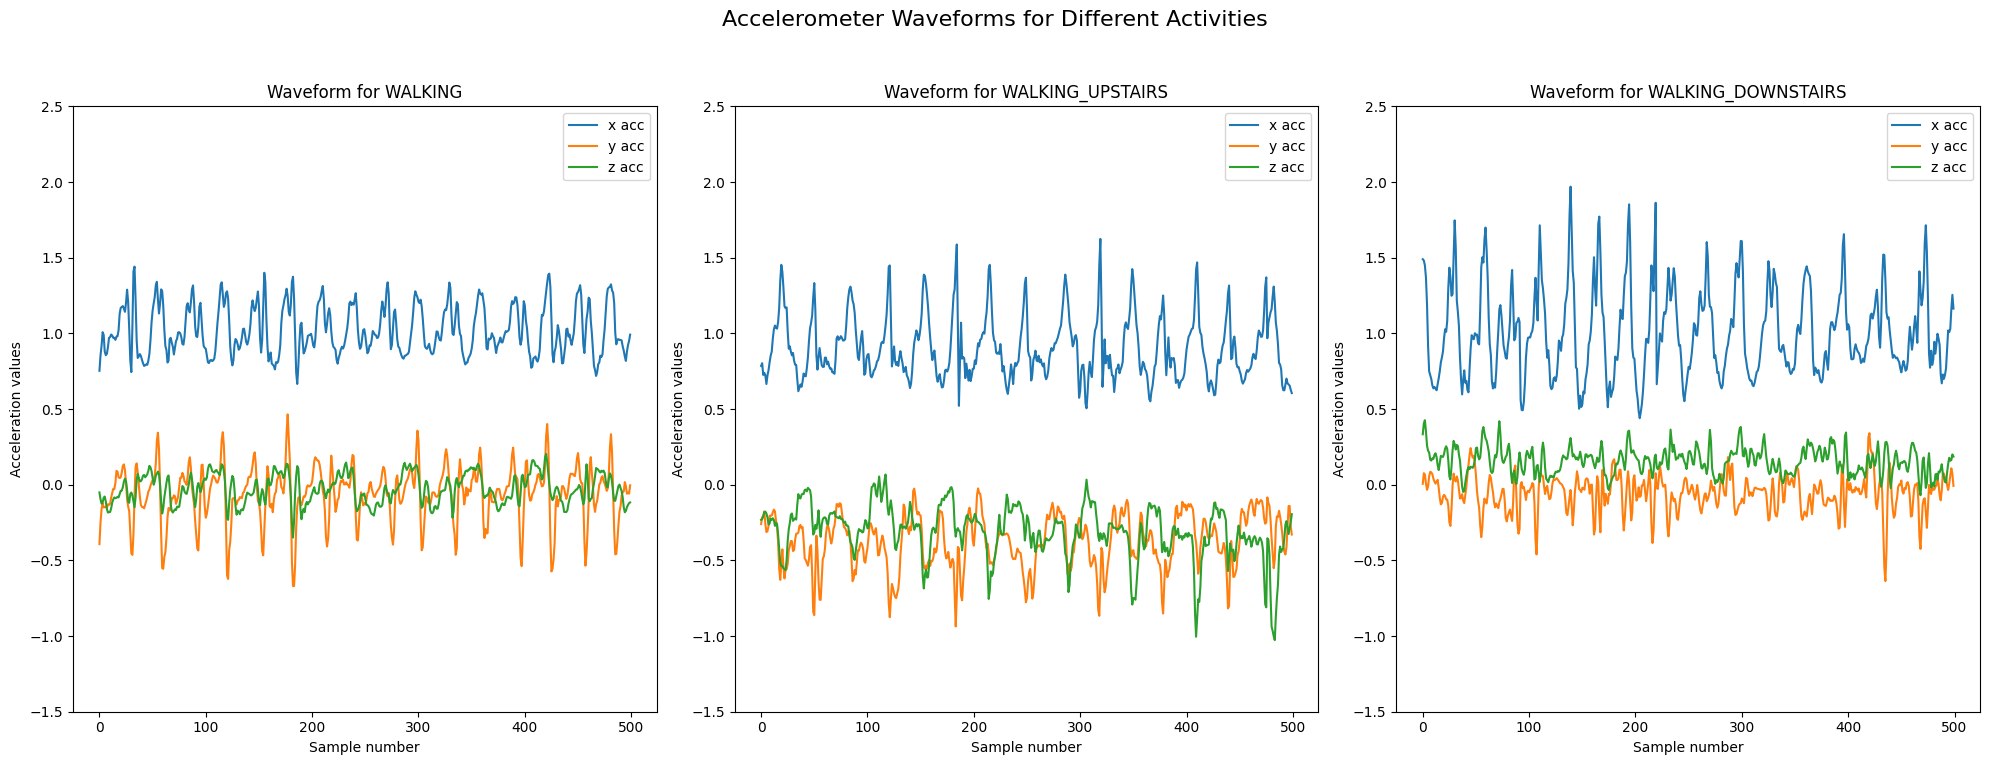

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = X_train[y_train == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# DEPLOYMENT

>We have 36 csv files for the test cases data collected, 6 each for 6 activities i.e. Sitting, Standing, Laying, Walking, Walking Upstairs, Walking downstairs.

>We utilize the app `Physics Toolbox Sensor Suite Pro` on smartphone to collect the data. We collected 6 samples per activity class. The .csv files can be accessed from the sub-folder 'Data_New' within the folder 'Mini-Project'.

>The video of data collection has also been uploaded and can be accessed from inside the same folder as the .csv files.

#### Pre-processing the Raw Data

In [ ]:
# Specify the base directory where your CSV files are located
base_directory = "Data_New/"

# Specify the activities and their corresponding file counts
activities = ["walk", "Climb_Up", "Walking_Downstairs", "Sitting", "Standing", "Laying"]
file_counts = [6, 6, 6, 6, 6, 6]

# Initialize an empty list to store file paths
file_paths = []

# Generate file paths dynamically based on the pattern
for activity, count in zip(activities, file_counts):
    for i in range(1, count + 1):
        file_name = f"{activity}_{i}.csv"
        file_path = f"{base_directory}{file_name}"
        file_paths.append(file_path)

In [ ]:
df = pd.read_csv(file_paths[0])
print(df)

          time     gFx     gFy     gFz   TgF
0     0.014588  0.9702  0.0507  0.0775  0.97
1     0.031583  0.9641  0.0524  0.0738  0.97
2     0.048791  0.9692  0.0519  0.0699  0.97
3     0.069477  0.9800  0.0643  0.0743  0.98
4     0.097059  1.0042  0.0705  0.0951  1.01
..         ...     ...     ...     ...   ...
726  14.721599  1.0081 -0.1395  0.1293  1.03
727  14.738223  0.9966 -0.1124  0.1554  1.01
728  14.756324  0.9868 -0.0478  0.1706  1.00
729  14.790683  1.1635  0.1765  0.1877  1.19
730  14.812762  1.2344 -0.1156 -0.1826  1.25

[731 rows x 5 columns]


In [ ]:
import numpy as np
import pandas as pd

# Initialize an empty array to store the combined data
combined_test_data = np.zeros((0, 500, 3))

# Loop through each file and append the data to the combined array
for file_path in file_paths:
    df = pd.read_csv(file_path)

    # Calculate the starting index to get the middle 500 rows
    start_index = df.shape[0] // 2 - 250
    end_index = start_index + 500

    # Select the middle 500 rows and the first 3 columns
    selected_data = df.iloc[start_index:end_index, 1:4].values

    # Append the selected data to the combined array
    combined_test_data = np.vstack((combined_test_data, [selected_data]))

y_test = pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6])

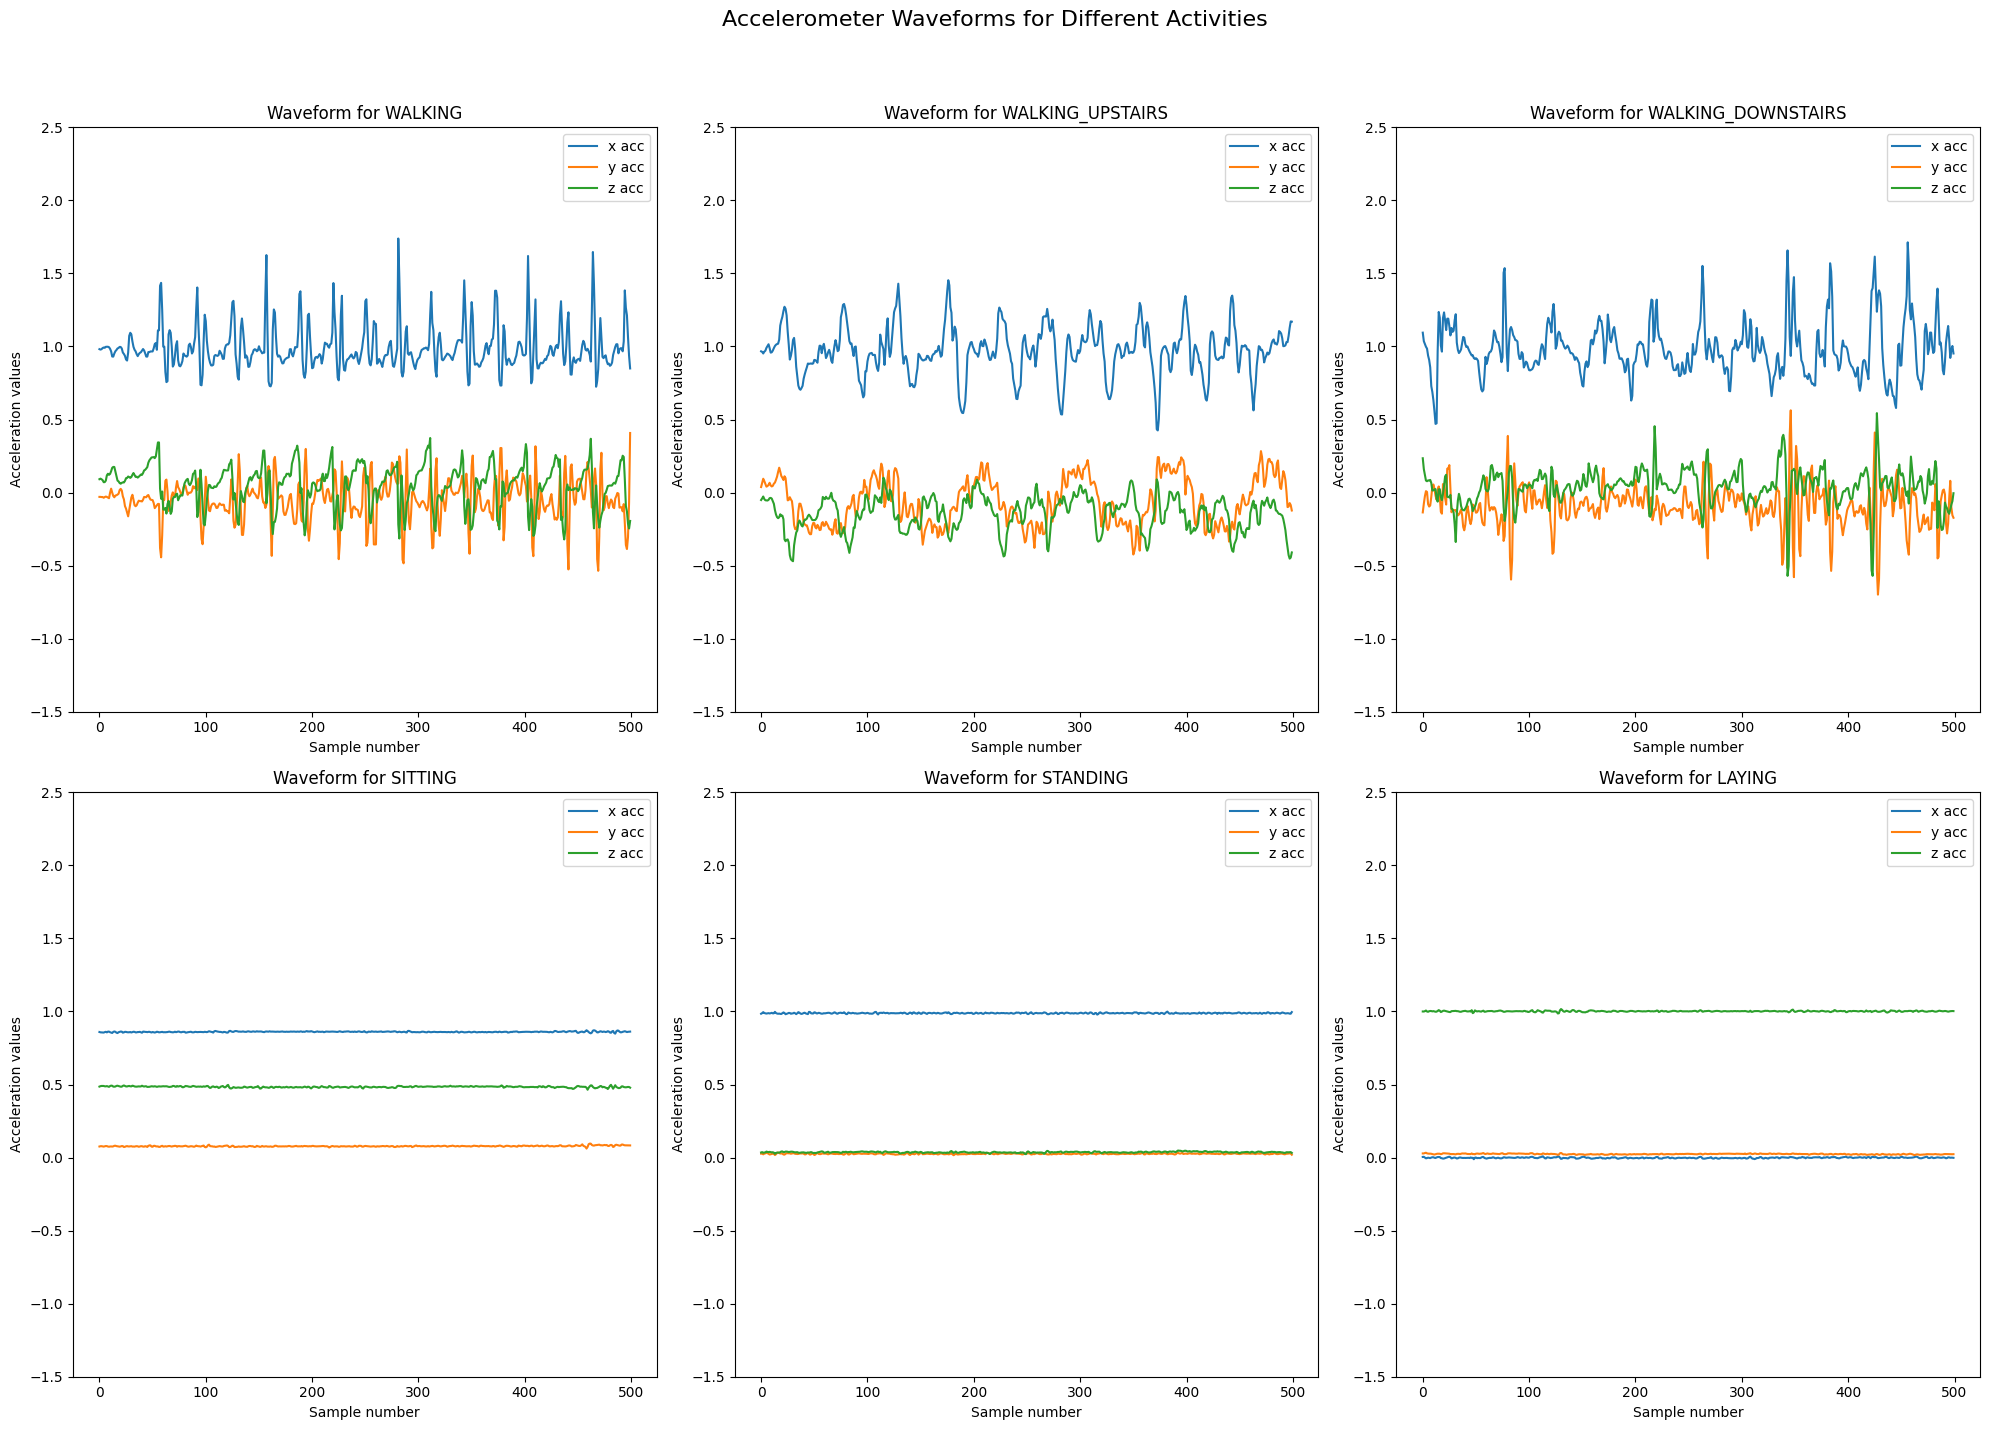

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2,
           "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = combined_test_data[y_test == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Accuracy and Confusion Matrix for Raw Data

Accuracy on test dataset: 41.66666666666667


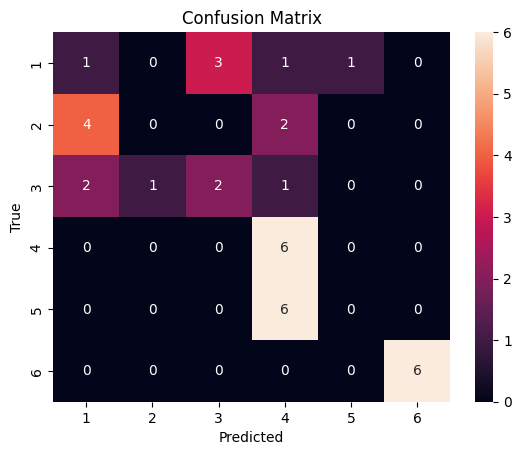

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Flatten the image data to 1D for each sample
X_train_flat = X_train.reshape(X_train.shape[0], -1)
combined_test_data_flat = combined_test_data.reshape(
    combined_test_data.shape[0], -1)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=42, min_samples_split=2, max_features='sqrt')

# Train the Decision Tree on the training set
clf.fit(X_train_flat, y_train)

# Evaluate on the test set
test_ac = accuracy_score(y_test, clf.predict(combined_test_data_flat))
print("Accuracy on test dataset:", test_ac * 100)

con_mat = confusion_matrix(y_test, clf.predict(combined_test_data_flat))

sns.heatmap(con_mat, annot=True, cbar=True, xticklabels=[
            1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Extracting features from raw data 

In [ ]:
cfg = tsfel.get_features_by_domain()
combined_test_data_extracted = []

for i in range(len(combined_test_data_flat)):
    features  =  tsfel.time_series_features_extractor(cfg, combined_test_data[i],fs=50, window_size=250) 
    combined_test_data_extracted.append(np.array(features))

combined_test_data_extracted = np.array(combined_test_data_extracted)

combined_test_data_extracted = combined_test_data_extracted.reshape(combined_test_data_extracted.shape[0],-1)

#### Accuracy and Confusion Matrix for Extracted Data

The accuracy on extracted data: 66.66666666666666%


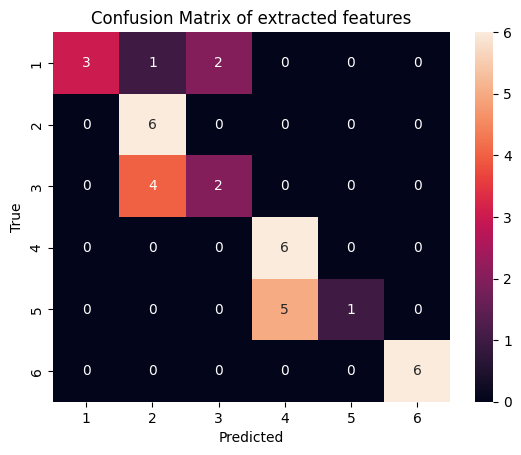

In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini', min_samples_split=2, random_state=42, max_features='sqrt')

clf.fit(X_train_extracted, y_train)

y_pred_extracted = clf.predict(combined_test_data_extracted)

acc = accuracy_score(y_test, y_pred_extracted)

print(f"The accuracy on extracted data: {acc*100}%")

cm_extracted = confusion_matrix(y_test, y_pred_extracted)
sns.heatmap(cm_extracted, annot=True, cbar=True, xticklabels=[
            1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of extracted features")
plt.show()

> Our Model performance is largely good with accuracy of about 42% for raw data and 67% for featurized data. Hence, it can be considered partially successsful.

> However, the Model performance is bad for the activities of "Walking" and "Walking Downstairs". These activities are often classified as "Walking Upstairs". This is due to the fact that these three activities exhibit similar patterns in acceleration data. The variations in acceleration during these activities are not be distinct enough for a model to reliably differentiate between them.

>Similarly, the Model performance is bad for the activity of 'Standing'. It is most oftenly misclassified as 'Sitting'. The reason for this misclassification can also be attributed to similarity in patterns between the two activities.